In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)
from functools import partial
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)

from l0bnb import fit_path



## Problem 8 

In [191]:
def nCp(sigma2, estimator, X, Y):
    "Negative Cp statistic"
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n 

In [192]:
np.random.seed(0)
predictor = np.random.normal(size =100)
noise = np.random.normal(size = 100)
Y = 1 + 1.4*predictor - 0.9*predictor**2 + 4.2*predictor**3 + noise
sim_data = pd.DataFrame({"X": predictor,
                         "X^2": predictor**2, 
                         "X^3": predictor**3,
                         "X^4": predictor**4,
                         "X^5": predictor**5,
                            "X^6": predictor**6,
                            "X^7": predictor**7,
                            "X^8": predictor**8,
                            "X^9": predictor**9,
                            "X^10": predictor**10,
                         "Y": Y})

design = MS(sim_data.columns.drop("Y")).fit(sim_data)
X = design.transform(sim_data)
sigma2 = OLS(Y, X).fit().scale
neg_CP = partial(nCp, sigma2)

In [193]:
strategy = Stepwise.first_peak(design,
                               direction='forward',
                               max_terms=len(design.terms))

X_MSE = sklearn_selected(OLS, strategy)

X_MSE.fit(sim_data, Y)
X_MSE.selected_state_

('X', 'X^10', 'X^2', 'X^3', 'X^4', 'X^5', 'X^6', 'X^7', 'X^8', 'X^9')

In [194]:
design_X_MSE = MS(X_MSE.selected_state_).fit(sim_data)
final_X_MSE = design_X_MSE.transform(sim_data)
model_MSE = OLS(Y, final_X_MSE).fit()
model_MSE.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2001.
Date:                Sat, 31 May 2025   Prob (F-statistic):          3.59e-100
Time:                        12:19:35   Log-Likelihood:                -139.57
No. Observations:                 100   AIC:                             301.1
Df Residuals:                      89   BIC:                             329.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3798      0.220      6.275      0.000       0.943       1.817
X              1.2975      0.621      2.091      0.039       0.064       2.531
X^10           0.0018      0.029      0.063      0.950      -0.055       0.059
X^2           -2.2865      1.593     -1.436      0.155      -5.451       0.878
X^3            3.4009      1.543      2.205      0.030       0.336       6.466
X^4            1.1357      2.578      0.441      0.661      -3.987       6.258
X^5            1.2123      1.176      1.031      0.305      -1.124       3.548
X^6           -0.3210      1.504     -0.213      0.832      -3.310       2.668
X^7           -0.4224      0.336     -1.259      0.211      -1.089       0.244
X^8            0.0219      0.355      0.062      0.951      -0.683       0.727
X^9            0.0416      0.032      1.319      0.190      -0.021       0.104
==============================================================================
Omnibus:                       12.606   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                5.096
Skew:                           0.286   Prob(JB):                       0.0782
Kurtosis:                       2.053   Cond. No.                     4.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [195]:
X_neg_CP = sklearn_selected(OLS, strategy, scoring = neg_CP)

X_neg_CP.fit(sim_data, Y)
X_neg_CP.selected_state_

('X', 'X^2', 'X^3', 'X^5')

In [196]:
design_X_neg_CP = MS(X_neg_CP.selected_state_).fit(sim_data)
final_X_neg = design_X_neg_CP.transform(sim_data)
model_neg_CP = OLS(sim_data["Y"], final_X_neg).fit()

model_neg_CP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     5031.
Date:                Sat, 31 May 2025   Prob (F-statistic):          1.26e-109
Time:                        12:19:36   Log-Likelihood:                -142.54
No. Observations:                 100   AIC:                             295.1
Df Residuals:                      95   BIC:                             308.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1772      0.133      8.881      0.000       0.914       1.440
X              1.1307      0.303      3.728      0.000       0.529       1.733
X^2           -1.0157      0.084    -12.073      0.000      -1.183      -0.849
X^3            4.5775      0.222     20.658      0.000       4.138       5.017
X^5           -0.0611      0.033     -1.841      0.069      -0.127       0.005
==============================================================================
Omnibus:                       10.184   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.985
Skew:                           0.175   Prob(JB):                        0.136
Kurtosis:                       2.087   Cond. No.                         55.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Weirdly this does choose a model that includes a statistically insignificant coefficeint for X^5. But aside from that this makes good sense since the actual Y model is just the first 3 terms and the coefficeints are close ish. 

In [197]:

lambdas = 10**np.linspace(3, -1, 100)

kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)
param_grid = {'lasso__alpha': lambdas}


lasso = skl.ElasticNet(alpha = lambdas, l1_ratio= 1)
scaler = StandardScaler(with_mean=True, with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('lasso', lasso)])
grid = skm.GridSearchCV(pipe, param_grid, cv = kfold, scoring= "neg_mean_squared_error")

grid.fit(X,Y)
grid.best_estimator_


Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', ElasticNet(alpha=0.1, l1_ratio=1))])

In [198]:
grid.best_estimator_.named_steps["lasso"].coef_

array([ 0.        ,  1.51254516, -1.14588925, 13.2867807 , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ])

<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
C:\Users\campz\AppData\Local\Temp\ipykernel_8596\2626436136.py:5: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


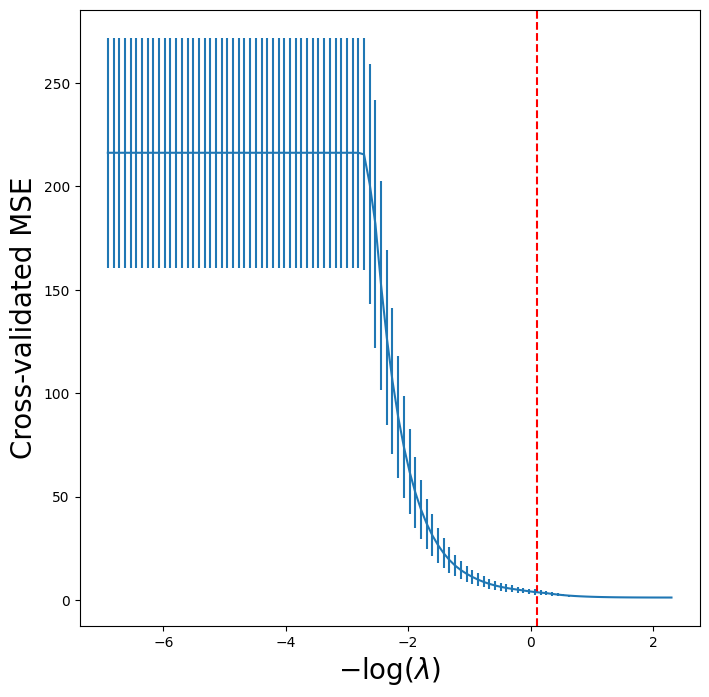

In [199]:
lasso_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            -grid.cv_results_['mean_test_score'],
            yerr=grid.cv_results_['std_test_score'] / np.sqrt(5))
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.axvline(grid.best_params_["lasso__alpha"], color='red', linestyle='--', label=f'Best $\\lambda$ = {-np.log(grid.best_params_["lasso__alpha"]):.2e}');



FWD Selection

In [200]:
y_new = 1 + 0.74*(predictor**7) + noise 
sim_data["Y"] = y_new 

sigmaB2 = OLS(y_new, X).fit().scale
neg_CP = partial(nCp, sigmaB2)

In [201]:
X_new = sklearn_selected(OLS, strategy, scoring = neg_CP)

X_new.fit(sim_data, y_new)

X_new_design = MS(X_new.selected_state_).fit(sim_data)
final_X_new = X_new_design.transform(sim_data)

fwdmodel = OLS( y_new, final_X_new).fit() 

summarize(fwdmodel)


,coef,std err,t,P>|t|
intercept,1.0639,0.104,10.217,0.000
X^3,0.1040,0.062,1.675,0.097
X^7,0.7366,0.002,317.800,0.000


Also took another insignificant predictor

Lasso 

In [203]:
lassoCV = skl.ElasticNetCV(alphas = lambdas, cv = 5, l1_ratio=1)
pipe2 = Pipeline(steps = [('scale',  scaler), ("lassoCV",  lassoCV)])
pipe2.fit(X, y_new)

pipe2.named_steps["lassoCV"].alpha_, pipe2.named_steps["lassoCV"].coef_

(0.1,
 array([ 0.00000000e+00, -2.10543254e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  8.02446446e+00,  0.00000000e+00,  4.41298576e+01,
         1.31503076e-01,  1.13780248e+01,  0.00000000e+00]))

In [205]:
lambdas, soln_array = skl.Lasso.path(X, 
                                    y_new,
                                    l1_ratio=1,
                                    alphas=lambdas)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         columns=X.columns,
                         index=-np.log(lambdas))

<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
C:\Users\campz\AppData\Local\Temp\ipykernel_8596\163252521.py:4: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


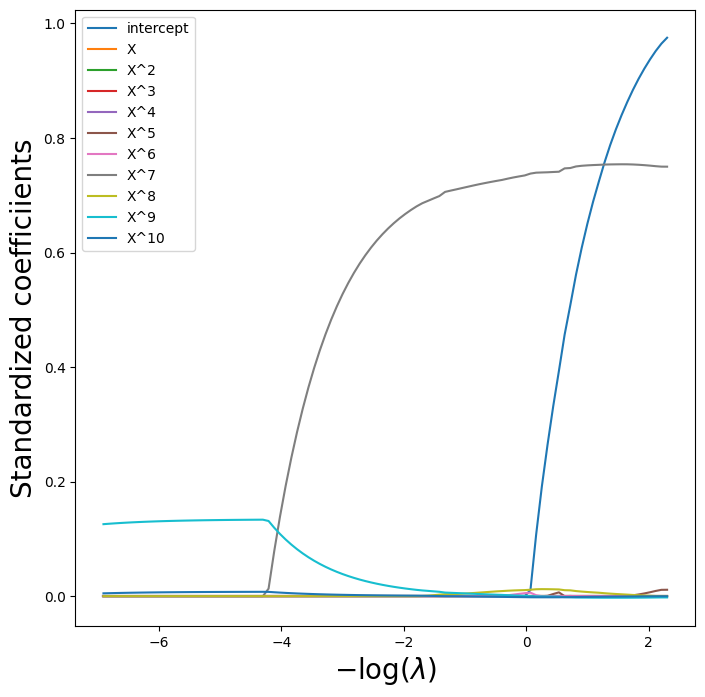

In [206]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);


### Problem 9

In [166]:
College = load_data("College")

X = College.columns.drop("Apps")
design = MS(X).fit(College)
X_final = design.transform(College)
Y = College["Apps"]

split = skm.ShuffleSplit(n_splits=1, 
                               test_size=0.25,
                               random_state=1)

for train_index, test_index in split.split(X_final):
    X_train, X_test = X_final.iloc[train_index], X_final.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

In [167]:
model = OLS(Y_train, X_train).fit()
test_mse = mean_squared_error(Y_test, model.predict(X_test))
test_mse

636075.2934899069

In [168]:
K = 5 
inner_cv = skm.KFold(K, shuffle = True, random_state=1)

ridgeCV = skl.RidgeCV(alphas = lambdas, cv = inner_cv)

pipe = Pipeline(steps = [("scale", scaler), ("ridgeCV", ridgeCV)])

results = skm.cross_validate(pipe, X_final, Y, cv = split, scoring='neg_mean_squared_error')
-results['test_score'][0]


656895.0865975757

In [ ]:

lassoCV = skl.LassoCV(alphas = lambdas, cv = inner_cv)
pipe2 = Pipeline(steps = [('scale', scaler), ('lassoCV', lassoCV)])
results = skm.cross_validate(pipe2, X_final, Y, cv = split, scoring = "neg_mean_squared_error")
-results['test_score'][0]

727625.270742684

In [171]:
pipe2.fit(X_train, Y_train)
pipe2.named_steps["lassoCV"].coef_

array([ 0.00000000e+00, -8.88135020e+01,  3.49738077e+03, -0.00000000e+00,
        5.42579598e+02, -1.76863564e+00, -0.00000000e+00,  0.00000000e+00,
       -2.54853133e+02,  1.45809477e+02,  0.00000000e+00,  0.00000000e+00,
       -7.68349253e+01, -3.75947733e+01,  1.29445508e+01, -0.00000000e+00,
        3.92252087e+02,  7.40743273e+01])

In [ ]:
##Sanity check
Y_pred = pipe2.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
mse

727625.270742684

In [184]:
pca = PCA(n_components = 2)
linreg = skl.LinearRegression()
param_grid = {"pca__n_components": range(1,20)}

pipe3 = Pipeline(steps = [ ("scale", scaler),
                           ('pca', pca), 
                          ("linreg", linreg)])

grid = skm.GridSearchCV(pipe3, param_grid, cv = kfold, scoring = "neg_mean_squared_error")


grid.fit(X_train, Y_train)

y_pred = grid.predict(X_test)
mse_PCR = mean_squared_error(Y_test, y_pred)
mse_PCR, grid.best_estimator_["pca"]

c:\Users\campz\anaconda3\envs\ISLP\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 95.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\campz\anaconda3\envs\ISLP\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\campz\anaconda3\envs\ISLP\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\campz\anaconda3\envs\ISLP\Lib\site-packages\sklearn\pipeline.py", line 654

(636075.2934902649, PCA(n_components=17))

In [189]:
pls = PLSRegression(n_components = 2, scale = True)
param_grid = {"n_components": range(1,18)}


grid = skm.GridSearchCV(pls, param_grid, cv = kfold, scoring = "neg_mean_squared_error")

grid.fit(X_train, Y_train)

y_pred = grid.predict(X_test)
mse_PLS = mean_squared_error(Y_test, y_pred)
-mse_PLS, grid.best_estimator_



(-641491.8216147542, PLSRegression(n_components=9))

### Problem 10 

In [ ]:
features = 20 
obs = 1000
coef_non_zero = 5
X_sim =np.random.normal(size = (obs, features))

B_sim = np.zeros(features)
nzi = np.random.choice(features, size = coef_non_zero, replace = False)

for idx in nzi:
    B_sim[idx] = np.random.randint(-200, 400)
noise_sim = np.random.normal(scale = 50, size = obs)
Y_sim = X_sim @ B_sim + noise_sim 
df = pd.DataFrame(
    X_sim, 
    columns = [ f"X{i+1}" for i in range(20)]
    )
df['Y'] = Y_sim
df.shape

(1000, 21)

In [317]:
split = skm.ShuffleSplit(n_splits = 1, test_size = 0.9, random_state=1)
X_data = df.drop(columns = "Y")
Y_data = df["Y"]


for train_idx, test_idx in split.split(X_data):
    df_train = df.iloc[train_idx]
    df_test = df.iloc[test_idx]



In [318]:
def get_final_data(df): 
    design = MS(df.drop(columns = "Y")).fit(df)
    X_final= design.transform(df)
    X_final = X_final.drop("intercept", axis =1)
    return np.asarray(X_final),  np.asarray(df["Y"])

X_train, Y_train = get_final_data(df_train)
X_test, Y_test  = get_final_data(df_test)

path = fit_path(X_train, Y_train, max_nonzeros = X_train.shape[1])

Preprocessing Data.
BnB Started.
Iteration: 1. Number of non-zeros:  1
Iteration: 2. Number of non-zeros:  2
Iteration: 3. Number of non-zeros:  3
Iteration: 4. Number of non-zeros:  4
Iteration: 5. Number of non-zeros:  4
Iteration: 6. Number of non-zeros:  4
Iteration: 7. Number of non-zeros:  5
Iteration: 8. Number of non-zeros:  5
Iteration: 9. Number of non-zeros:  5
Iteration: 10. Number of non-zeros:  5
Iteration: 11. Number of non-zeros:  5
Iteration: 12. Number of non-zeros:  5
Iteration: 13. Number of non-zeros:  5
Iteration: 14. Number of non-zeros:  5
Iteration: 15. Number of non-zeros:  5
Iteration: 16. Number of non-zeros:  5
Iteration: 17. Number of non-zeros:  7
Iteration: 18. Number of non-zeros:  7
Iteration: 19. Number of non-zeros:  7
Iteration: 20. Number of non-zeros:  7
Iteration: 21. Number of non-zeros:  7
Iteration: 22. Number of non-zeros:  7
Iteration: 23. Number of non-zeros:  7
Iteration: 24. Number of non-zeros:  7
Iteration: 25. Number of non-zeros:  7
I

In [328]:
train_mse = []
test_mse = []
num_nonzero = []
lamb = []
total_coef =[]
intercepts = []


for beta in path: 
    coefs = beta['B']
    intercept = beta["B0"]

    intercepts.append(beta["B0"])
    total_coef.append(beta['B'])
    lamb.append(beta["lambda_0"])


    y_train_pred = X_train @ coefs + intercept
    y_test_pred = X_test @ coefs + intercept

    train_mse.append(mean_squared_error(Y_train, y_train_pred))
    test_mse.append(mean_squared_error(Y_test, y_test_pred))

    num_nonzero.append(len(np.nonzero(beta["B"])[0]))

df_mse = pd.DataFrame({"train mse": train_mse, 
                       "test mse": test_mse,
                       "nonzero": num_nonzero, 
                       "lambda": lamb, 
                       "coefficient": total_coef, 
                       "intercept": intercepts})

df_best_train = df_mse.loc[df_mse.groupby("nonzero")["train mse"].idxmin()]
df_best_test = df_mse.loc[df_mse.groupby("nonzero")["test mse"].idxmin()]

idx = df_best_test["test mse"].idxmin()
idx

6

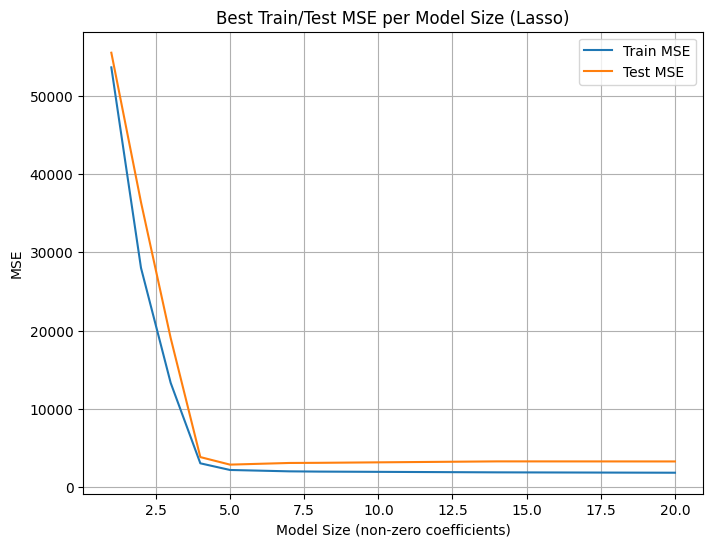

In [327]:
plt.figure(figsize=(8, 6))
plt.plot(df_best_train["nonzero"], df_best_train["train mse"], label="Train MSE")
plt.plot(df_best_test["nonzero"], df_best_test["test mse"], label="Test MSE")
plt.xlabel("Model Size (non-zero coefficients)")
plt.ylabel("MSE")
plt.title("Best Train/Test MSE per Model Size (Lasso)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_compare = pd.DataFrame ({"actual coefficients": B_sim, 
                            "Simulated Coefs": df_best_test.iloc[idx]["coefficient"]})
df_compare

,actual coefficients,Simulated Coefs
0,0.0,0.000000
1,0.0,10.701424
2,0.0,0.000000
3,0.0,0.000000
4,282.0,269.755335
5,-161.0,-160.547668
6,119.0,117.232465
7,0.0,1.314445
8,0.0,0.000000
9,0.0,0.000000


In [340]:
estimate = []

for i in range(0, 21):
    train_mse = []
    test_mse = []
    num_nonzero = []
    lamb = []
    total_coef =[]
    intercepts = []

    X_sim =np.random.normal(size = (obs, features))
    B_sim = np.zeros(features)
    nzi = np.random.choice(features, size = coef_non_zero, replace = False)
    for idx in nzi:
        B_sim[idx] = np.random.randint(-200, 400)
    noise_sim = np.random.normal(scale = 50, size = obs)
    Y_sim = X_sim @ B_sim + noise_sim 
    df = pd.DataFrame(
        X_sim, 
        columns = [ f"X{i+1}" for i in range(20)]
        )
    df['Y'] = Y_sim

    split = skm.ShuffleSplit(n_splits = 1, test_size = 0.9, random_state=1)
    X_data = df.drop(columns = "Y")
    Y_data = df["Y"]


    for train_idx, test_idx in split.split(X_data):
        df_train = df.iloc[train_idx]
        df_test = df.iloc[test_idx]

    X_train, Y_train = get_final_data(df_train)
    X_test, Y_test  = get_final_data(df_test)

    path = fit_path(X_train, Y_train, max_nonzeros = X_train.shape[1])

    for beta in path: 

        coefs = beta['B']
        intercept = beta["B0"]

        intercepts.append(beta["B0"])
        total_coef.append(beta['B'])
        lamb.append(beta["lambda_0"])


        y_train_pred = X_train @ coefs + intercept
        y_test_pred = X_test @ coefs + intercept

        train_mse.append(mean_squared_error(Y_train, y_train_pred))
        test_mse.append(mean_squared_error(Y_test, y_test_pred))

        num_nonzero.append(len(np.nonzero(beta["B"])[0]))

    df_mse = pd.DataFrame({"train mse": train_mse, 
                        "test mse": test_mse,
                        "nonzero": num_nonzero, 
                        "lambda": lamb, 
                        "coefficient": total_coef, 
                        "intercept": intercepts})

    df_best_test = df_mse.loc[df_mse.groupby("nonzero")["test mse"].idxmin()]

    best_row = df_best_test.loc[df_best_test["test mse"].idxmin()]

    df_compare = pd.DataFrame ({"actual coefficients": B_sim, 
                            "Simulated Coefs": best_row["coefficient"]})
    
    diffs = (df_compare["actual coefficients"] - df_compare["Simulated Coefs"])**2
    estimate.append((diffs.sum())**0.5)


    

    
    

Preprocessing Data.
BnB Started.
Iteration: 1. Number of non-zeros:  1
Iteration: 2. Number of non-zeros:  3
Iteration: 3. Number of non-zeros:  4
Iteration: 4. Number of non-zeros:  5
Iteration: 5. Number of non-zeros:  5
Iteration: 6. Number of non-zeros:  5
Iteration: 7. Number of non-zeros:  5
Iteration: 8. Number of non-zeros:  5
Iteration: 9. Number of non-zeros:  5
Iteration: 10. Number of non-zeros:  5
Iteration: 11. Number of non-zeros:  5
Iteration: 12. Number of non-zeros:  5
Iteration: 13. Number of non-zeros:  5
Iteration: 14. Number of non-zeros:  5
Iteration: 15. Number of non-zeros:  5
Iteration: 16. Number of non-zeros:  5
Iteration: 17. Number of non-zeros:  5
Iteration: 18. Number of non-zeros:  8
Iteration: 19. Number of non-zeros:  8
Iteration: 20. Number of non-zeros:  8
Iteration: 21. Number of non-zeros:  8
Iteration: 22. Number of non-zeros:  8
Iteration: 23. Number of non-zeros:  8
Iteration: 24. Number of non-zeros:  8
Iteration: 25. Number of non-zeros:  8
I

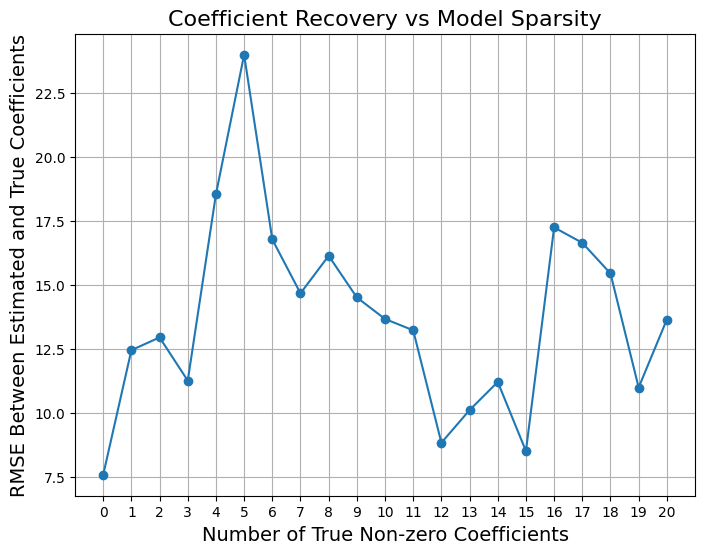

In [341]:
x_vals = list(range(0, 21)) 

plt.figure(figsize=(8, 6))
plt.plot(x_vals, estimate, marker='o')
plt.xlabel("Number of True Non-zero Coefficients", fontsize=14)
plt.ylabel("RMSE Between Estimated and True Coefficients", fontsize=14)
plt.title("Coefficient Recovery vs Model Sparsity", fontsize=16)
plt.grid(True)
plt.xticks(x_vals)  
plt.show()